In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./Visadataset.csv")

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Checking for Missing values in the dataset


In [5]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

## Checking for duplicate values in the dataset


In [6]:
df.duplicated().any()

False

There are no duplicate values in the dataset


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
categorical_columns = df.select_dtypes(include="object").columns

In [9]:
numerical_columns = df.select_dtypes(include=["int", "float"]).columns

In [10]:
numerical_columns[0], numerical_columns[1]

('no_of_employees', 'yr_of_estab')

<Axes: xlabel='no_of_employees', ylabel='prevailing_wage'>

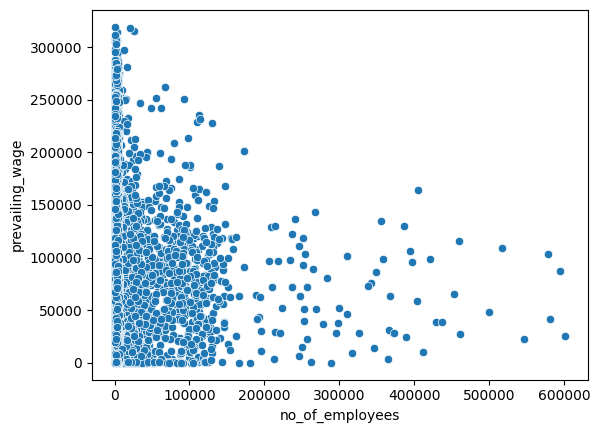

In [11]:
sns.scatterplot(x=numerical_columns[0], y=numerical_columns[2], data=df)

In [12]:
df.groupby(by="continent")["case_status"].count()

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
Name: case_status, dtype: int64

In [13]:
case_status_grouped_by_continent = (
    df.groupby(by="continent")["case_status"]
    .value_counts()
    .unstack()
    .fillna(0)
    .reset_index()
)

In [14]:
case_status_grouped_by_continent

case_status,continent,Certified,Denied
0,Africa,397,154
1,Asia,11012,5849
2,Europe,2957,775
3,North America,2037,1255
4,Oceania,122,70
5,South America,493,359


<Axes: xlabel='continent', ylabel='Certified'>

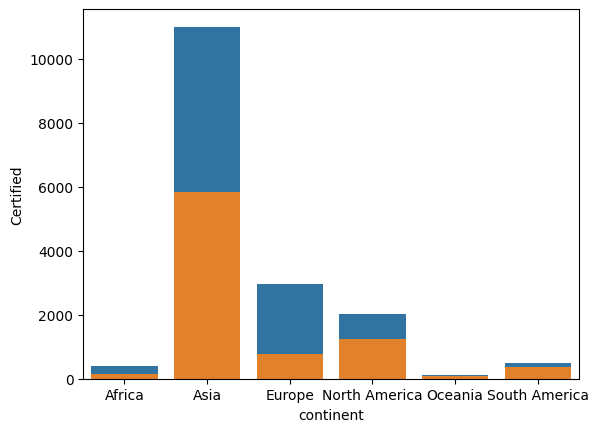

In [15]:
sns.barplot(x="continent", y="Certified", data=case_status_grouped_by_continent)
sns.barplot(x="continent", y="Denied", data=case_status_grouped_by_continent)

In [16]:
melted_case_status_by_continent = case_status_grouped_by_continent.melt(
    id_vars="continent", var_name="Case_status", value_name="Count"
)

In [17]:
melted_case_status_by_continent.head()

,continent,Case_status,Count
0,Africa,Certified,397
1,Asia,Certified,11012
2,Europe,Certified,2957
3,North America,Certified,2037
4,Oceania,Certified,122


In [18]:
melted_case_status_by_continent["percentage_approvals"] = (
    melted_case_status_by_continent["Count"].apply(
        lambda x: (round(x / sum(melted_case_status_by_continent["Count"]) * 100, 0))
    )
)

In [19]:
melted_case_status_by_continent.head()

,continent,Case_status,Count,percentage_approvals
0,Africa,Certified,397,2.0
1,Asia,Certified,11012,43.0
2,Europe,Certified,2957,12.0
3,North America,Certified,2037,8.0
4,Oceania,Certified,122,0.0


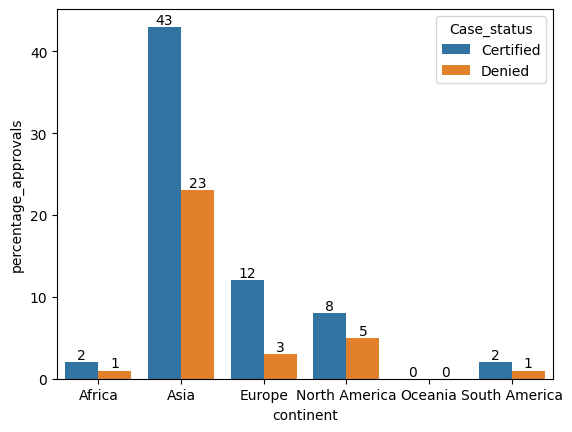

In [20]:
barplot = sns.barplot(
    x="continent",
    y="percentage_approvals",
    hue="Case_status",
    data=melted_case_status_by_continent,
    dodge=True,
)
# Add y-values on each bar
for container in barplot.containers:
    barplot.bar_label(container, fmt="%.0f", label_type="edge")

In [21]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [22]:
case_status_grouped_by_continent_and_education_ = (
    df.groupby(by="continent")[["education_of_employee", "case_status"]]
    .value_counts()
    .unstack()
    .fillna(0)
    .reset_index()
)

In [23]:
case_status_grouped_by_continent_and_education_.head(2)

case_status,continent,education_of_employee,Certified,Denied
0,Africa,Bachelor's,81,62
1,Africa,Doctorate,43,11


In [24]:
melted_case_status_by_continent_and_education = (
    case_status_grouped_by_continent_and_education_.melt(
        id_vars=["continent", "education_of_employee"],
        var_name="case_status",
        value_name="count",
    )
)

In [25]:
melted_case_status_by_continent_and_education.columns

Index(['continent', 'education_of_employee', 'case_status', 'count'], dtype='object')

In [26]:
melted_case_status_by_continent_and_education.head(2)

,continent,education_of_employee,case_status,count
0,Africa,Bachelor's,Certified,81
1,Africa,Doctorate,Certified,43


In [27]:
df["region_of_employment"].value_counts()

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

In [28]:
df.head(1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied


In [29]:
case_status_grouped_with_region_and_continent = (
    df.groupby(by="continent")[["region_of_employment", "case_status"]]
    .value_counts()
    .unstack()
    .fillna(0)
    .reset_index()
)

In [30]:
melted_case_status_by_continent_and_regionwise = (
    case_status_grouped_with_region_and_continent.melt(
        id_vars=("continent", "region_of_employment"),
        var_name="case_status",
        value_name="count",
    )
)

In [31]:
melted_case_status_by_continent_and_regionwise.head(2)

,continent,region_of_employment,case_status,count
0,Africa,Island,Certified,3
1,Africa,Midwest,Certified,70


<Axes: xlabel='continent', ylabel='count'>

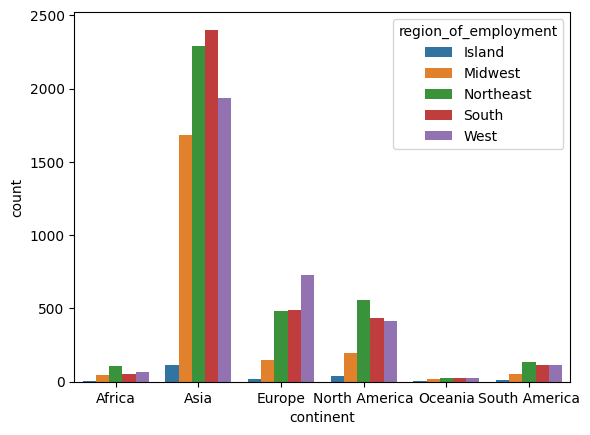

In [32]:
sns.barplot(
    data=melted_case_status_by_continent_and_regionwise,
    x="continent",
    y="count",
    hue="region_of_employment",
    errorbar=None,
)

In [33]:
df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


In [34]:
df.drop(columns=["case_id", "requires_job_training"], inplace=True)

In [35]:
df.head(2)

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,2412,2002,Northeast,83425.6500,Year,Y,Certified


In [36]:
numerical_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

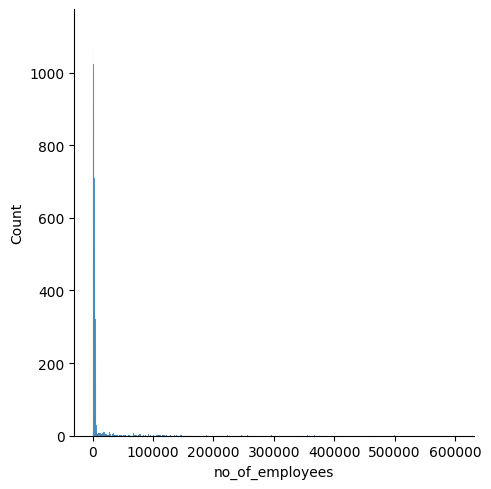

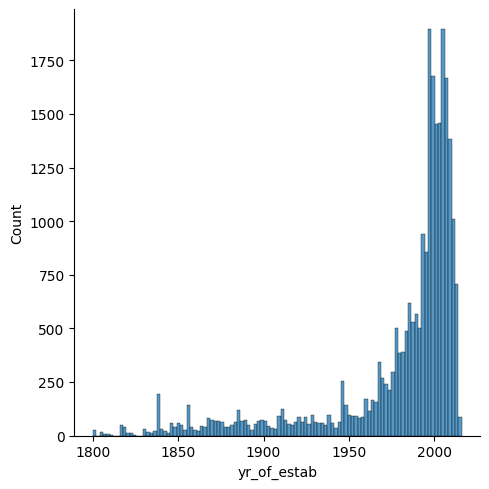

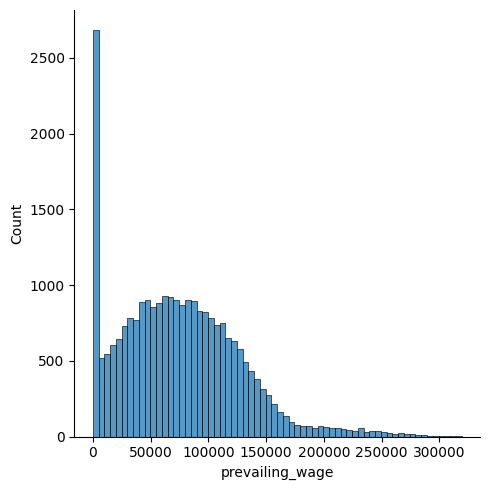

In [37]:
for col in numerical_columns:
    sns.displot(df[col])

<Axes: xlabel='prevailing_wage', ylabel='Density'>

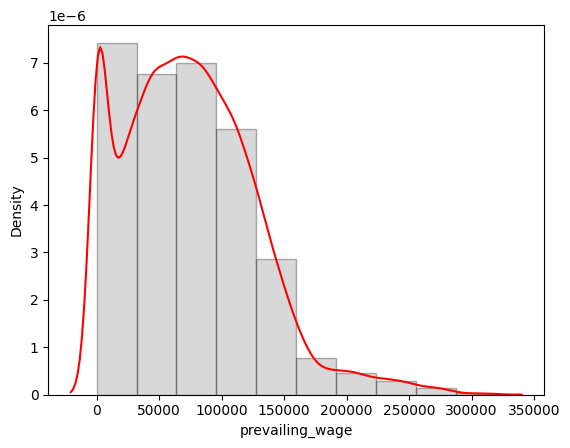

In [38]:
plt.hist(
    df[numerical_columns[2]], color="gray", alpha=0.3, edgecolor="black", density=True
)
sns.kdeplot(df[numerical_columns[2]], color="red")

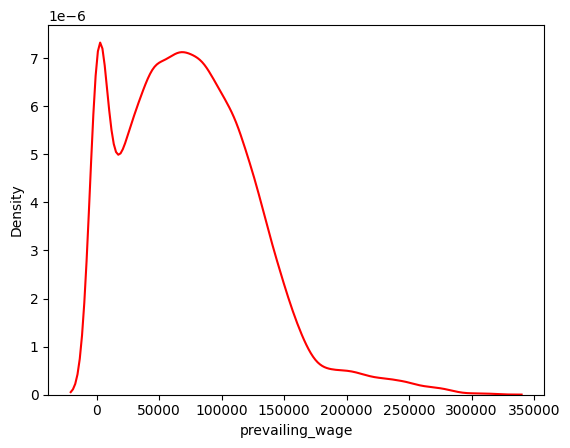

In [39]:
sns.kdeplot(data=df, x=numerical_columns[2], color="red")

plt.show()

<Axes: xlabel='no_of_employees', ylabel='Density'>

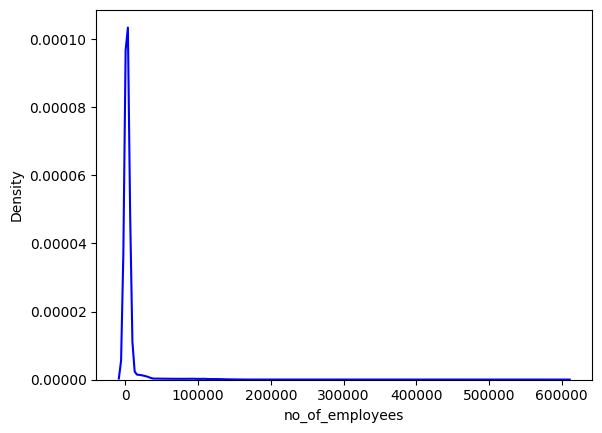

In [40]:
sns.kdeplot(df[numerical_columns[0]], color="blue")

Since the numerical columns are right skewed, we can try log transformation on these columns.


In [41]:
df["no_of_employees"].skew() * 100

1226.5260077708274

In [42]:
df["prevailing_wage"].skew() * 100

75.57760603032042

In [43]:
import numpy as np

d:\Ineuron\MLOPS Prod Ready\us-visa-approval-mlops-project\visa_project_venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='no_of_employees', ylabel='Density'>

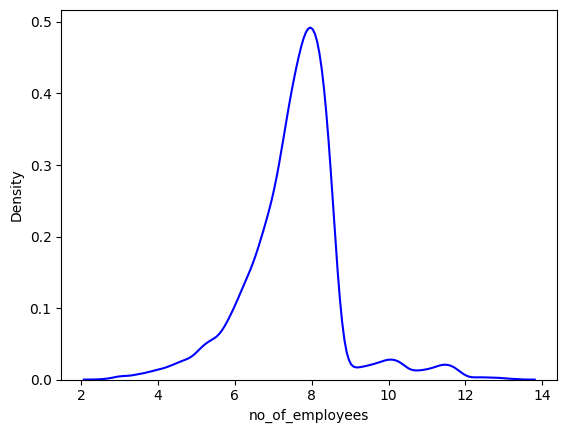

In [44]:
sns.kdeplot(np.log1p(df["no_of_employees"]), color="blue")

In [45]:
np.sqrt(df["prevailing_wage"]).skew()

-0.443952281351034

In [46]:
import statsmodels.api as sm

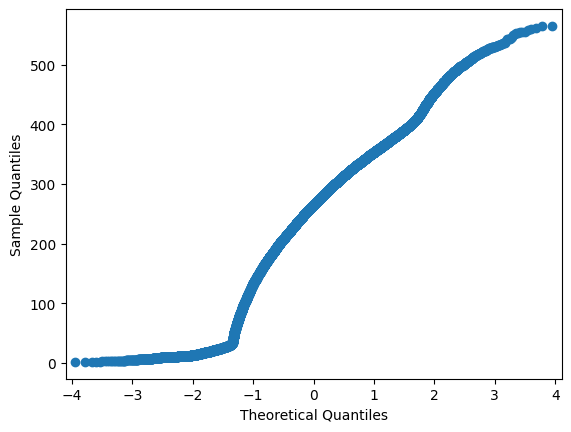

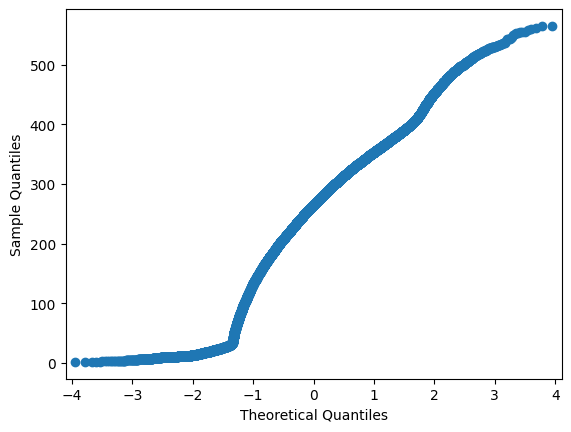

In [47]:
sm.qqplot(np.sqrt(df["prevailing_wage"]))

<Axes: xlabel='prevailing_wage', ylabel='Density'>

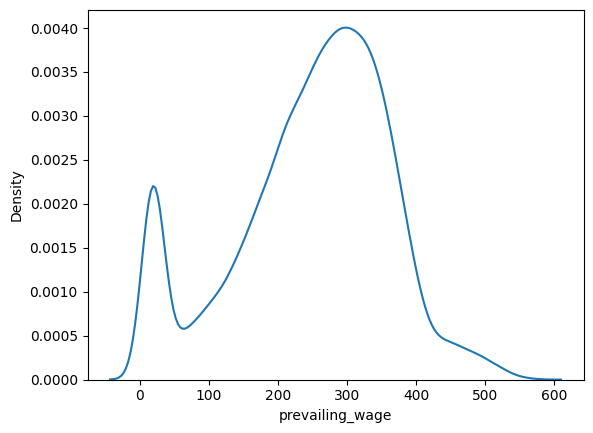

In [48]:
sns.kdeplot(np.sqrt(df["prevailing_wage"]))

In [49]:
from sklearn.preprocessing import PowerTransformer

In [50]:
pd.DataFrame(
    PowerTransformer(method="yeo-johnson").fit_transform(df[["no_of_employees"]])
).skew() * 100

0    39.933929
dtype: float64

<Axes: ylabel='Density'>

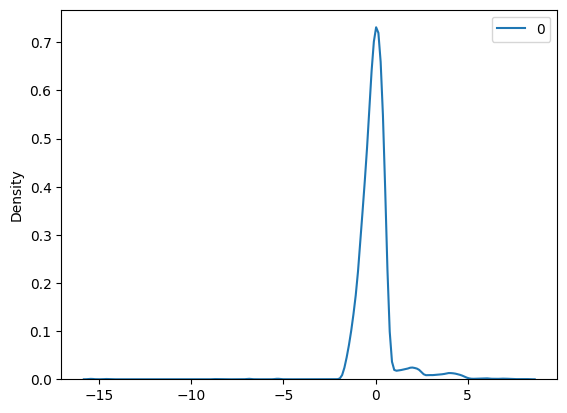

In [51]:
sns.kdeplot(
    PowerTransformer(method="yeo-johnson").fit_transform(df[["no_of_employees"]])
)

In [52]:
df["no_of_employees"] = df["no_of_employees"].apply(lambda x: abs(x))

In [53]:
(df["no_of_employees"] < 0).any()

False

In [54]:
np.log1p(df["no_of_employees"]).skew() * 100

10.016162796126753

<Axes: xlabel='no_of_employees', ylabel='Density'>

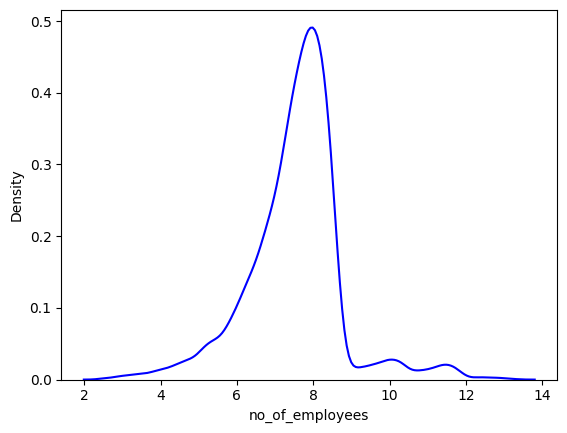

In [55]:
sns.kdeplot(np.log1p(df["no_of_employees"]), color="blue")

In [56]:
pt = PowerTransformer(method="yeo-johnson")

In [57]:
temp = pd.DataFrame(pt.fit_transform(df[["no_of_employees"]]))

In [58]:
pt.lambdas_

array([-0.01295439])

In [59]:
temp.skew() * 100

0   -1.446571
dtype: float64

<Axes: ylabel='Density'>

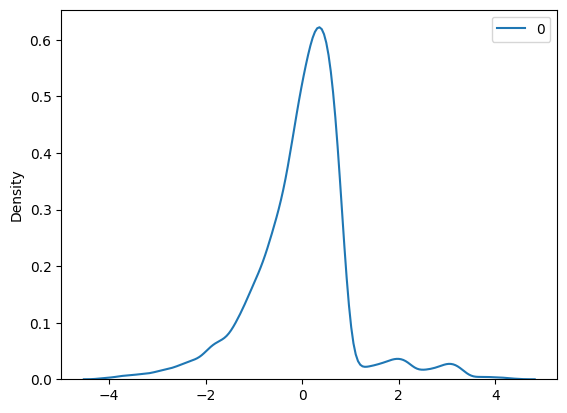

In [61]:
sns.kdeplot(temp)